# Contour plot

![](contour_plot.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

In [38]:
fig_size = (8, 6)
tick_size = 16
if True:
    # this is a latex constant, don't change it.
    pts_per_inch = 72.27
    # write "\the\textwidth" (or "\showthe\columnwidth" for a 2 collumn text)
    text_width_in_pts = 246.0
    # inside a figure environment in latex, the result will be on the
    # dvi/pdf next to the figure. See url above.
    text_width_in_inches = text_width_in_pts / pts_per_inch
    # make rectangles with a nice proportion
    golden_ratio = 0.618
    # figure.png or figure.eps will be intentionally larger, because it is prettier
    inverse_latex_scale = 2
    # when compiling latex code, use
    # \includegraphics[scale=(1/inverse_latex_scale)]{figure}
    # we want the figure to occupy 2/3 (for example) of the text width
    fig_proportion = (3.0 / 3.0)
    csize = inverse_latex_scale * fig_proportion * text_width_in_inches
    # always 1.0 on the first argument
    fig_size = (1.0 * csize,golden_ratio * csize)
    # find out the fontsize of your latex text, and put it here
    text_size = inverse_latex_scale * 12
    tick_size = inverse_latex_scale * 8
    # learn how to configure:
    # http://matplotlib.sourceforge.net/users/customizing.html
    params = {'backend': 'ps',
            'axes.labelsize': text_size,
            'legend.fontsize': tick_size,
            'legend.handlelength': 2.5,
            'legend.borderaxespad': 0,
            'xtick.labelsize': tick_size,
            'ytick.labelsize': tick_size,
            'font.family': 'serif',
            'font.size': text_size,
            # Times, Palatino, New Century Schoolbook,
            # Bookman, Computer Modern Roman
            'font.serif': ['Times'],
            'ps.usedistiller': 'xpdf',
            'text.usetex': True,
            'figure.figsize': fig_size,
            # include here any neede package for latex
            'text.latex.preamble': r'\usepackage{amsmath}',
            }
    plt.rcParams.update(params)

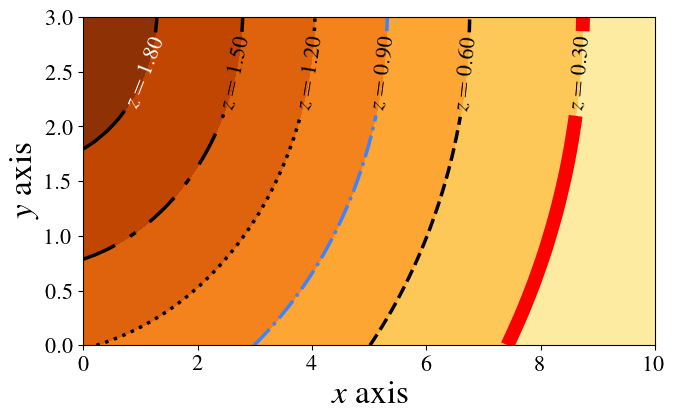

In [41]:
fig, ax = plt.subplots(figsize=fig_size)
fig.subplots_adjust(left=0.12, right=0.96, top=0.96, bottom=0.18,
                    hspace=0.02, wspace=0.02)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('YlOrBr')
my_cmap = truncate_colormap(cmap, 0.2, 0.9)

minX = 0
maxX = 10
minY = 0
maxY = 3
N = 50j
y, x = np.mgrid[minY:maxY:N, minX:maxX:N]
z = 2 * np.exp(-(0.02 * (x + 1) ** 2 + 0.05 * (y - 3.1) **2 ))

divisions = np.arange(0.3, 2.1, 0.3)
divisions2 = np.append(divisions, 2.5)
divisions2 = np.append(-0.5, divisions2)
# contour filled with colors
ax.contourf(x, y, z, divisions2, cmap=my_cmap, vmin=0.0,vmax=2.0)


line_styles = ['solid', 'dashed', 'dashdot', 'dotted', (0, (10,5,2,5)), 'solid', ]
line_widths = [10, 2.5, 2.5, 2.5, 2.5, 2.5]
colors = ['red', 'black', 'xkcd:dodger blue', 'black', 'black', 'black']

# contour lines
cont = ax.contour(x, y, z, divisions,
                  colors=colors,
                  linewidths=line_widths,
                  linestyles=line_styles)
# labels
manual_locations = [(1.0, 2.5), (2.5, 2.5),
                    (3.8, 2.5), (5.0, 2.5),
                    (6.2, 2.5), (8.3, 2.5)]
ax.clabel(cont, inline=1, fontsize=tick_size,
          fmt=r'$z=%.2f$', manual=manual_locations,
          colors=5 * ['black'] + ['white'])

ax.set_xlabel(r"$x$ axis")
ax.set_ylabel(r"$y$ axis")

fig.savefig('contour_plot.png', dpi=300)